In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pysal as ps


%matplotlib inline

In [3]:
df = pd.read_excel('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/marine_protection/mpai_tabulardata_october2014/mpai_tabulardata_october2014.xls')

http://marineprotectedareas.noaa.gov/dataanalysis/mpainventory/ ???

In [4]:
df.head(40)

,Site_ID,Site_Name,Site_Label,Gov_Level,State,GIS_Data,NS_Full,Prot_Lvl,Mgmt_Plan,Mgmt_Agen,...,Cons_Focus,Prot_Focus,Permanence,Constancy,Estab_Yr,URL,Vessel,Anchor,Area_KM_Total,Area_KM_Marine
0,AK1,Southeast Alaska Dive Fishery Research Areas,SE AK Dive Fishery Research Areas,State,Alaska,Yes,Eligible,Uniform Multiple Use,Non-MPA Programmatic Species Management Plan,Alaska Department of Fish and Game,...,Sustainable Production,Focal Resource,Permanent,Year-round,1991.0,NaN,NaN,NaN,3444.429688,3446.713379
1,AK10,Sitka Sound Lingcod Closure,Sitka Snd. Lingcod Closure,State,Alaska,Yes,Eligible,Uniform Multiple Use,Non-MPA Programmatic Fisheries Management Plan,Alaska Department of Fish and Game,...,Sustainable Production,Focal Resource,Permanent,Year-round,1997.0,NaN,NaN,NaN,710.095215,710.553833
2,AK11,Black Rockfish Closure Areas,Black Rockfish CAs,State,Alaska,Yes,Eligible,Uniform Multiple Use,Non-MPA Programmatic Fisheries Management Plan,Alaska Department of Fish and Game,...,Sustainable Production,Focal Resource,Permanent,Year-round,1997.0,NaN,NaN,NaN,36193.753906,37441.722656
3,AK12,Demersal Shelf Rockfish Closed Area - Southeas...,DSRCA - SE AK,State,Alaska,Yes,Eligible,Uniform Multiple Use,Non-MPA Programmatic Fisheries Management Plan,Alaska Department of Fish and Game,...,Sustainable Production,Focal Resource,Permanent,Year-round,1997.0,NaN,NaN,NaN,2256.114990,2257.499756
4,AK13,Shrimp Trawl Fishery Closure - Southeast Alaska,Shrimp Trawl FC - SE AK,State,Alaska,Yes,Eligible,Uniform Multiple Use,Non-MPA Programmatic Fisheries Management Plan,Alaska Department of Fish and Game,...,Sustainable Production,Focal Resource,Permanent,Year-round,1997.0,NaN,NaN,NaN,2237.876953,2238.418457
5,AK14,Shrimp Trawl Fishery Closure - Western and Cen...,Shrimp Trawl FC - Western & Central GoA,State,Alaska,Yes,Eligible,Uniform Multiple Use,Non-MPA Programmatic Fisheries Management Plan,Alaska Department of Fish and Game,...,Sustainable Production,Focal Resource,Permanent,Year-round,1997.0,NaN,NaN,NaN,2460.482178,2461.038086
6,AK2,Trawl Gear Restricted Areas - Prince William S...,TGRAs - Prince William Snd.,State,Alaska,Yes,Eligible,Uniform Multiple Use,Non-MPA Programmatic Fisheries Management Plan,Alaska Department of Fish and Game,...,Sustainable Production,Focal Resource,Permanent,Year-round,1985.0,NaN,NaN,NaN,2535.922607,2536.385986
7,AK23,Shrimp Pot Fishery Closure - Prince William Sound,Shrimp Pot FC - Prince William Snd.,State,Alaska,Yes,Eligible,Uniform Multiple Use,Non-MPA Programmatic Fisheries Management Plan,Alaska Department of Fish and Game,...,Sustainable Production,Focal Resource,Permanent,Year-round,1981.0,NaN,NaN,NaN,13218.233398,13221.675781
8,AK24,"Shrimp Fishery Closure, All gear types - Cook ...","Shrimp FC, All gear types - Cook Inlet",State,Alaska,Yes,Eligible,Uniform Multiple Use,Non-MPA Programmatic Fisheries Management Plan,Alaska Department of Fish and Game,...,Sustainable Production,Focal Resource,Permanent,Year-round,1997.0,NaN,NaN,NaN,34803.121094,34804.691406
9,AK25,Walrus Islands State Game Sanctuary,Walrus Islands State Game Sanctuary,State,Alaska,Yes,Eligible,Zoned w/No Take Areas,Non-MPA Programmatic Species Management Plan,Alaska Department of Fish and Game,...,Sustainable Production,Focal Resource,Permanent,Year-round,1989.0,NaN,NaN,NaN,745.460999,753.324646


In [5]:
df.shape

(1774, 22)

In [6]:
maine = df[df['State'] == 'Maine']

In [7]:
maine.head()

,Site_ID,Site_Name,Site_Label,Gov_Level,State,GIS_Data,NS_Full,Prot_Lvl,Mgmt_Plan,Mgmt_Agen,...,Cons_Focus,Prot_Focus,Permanence,Constancy,Estab_Yr,URL,Vessel,Anchor,Area_KM_Total,Area_KM_Marine
919,ME13,Royal River,Royal River,State,Maine,No,Not Eligible,Uniform Multiple Use,MPA Programmatic Management Plan,Maine Department of Marine Resources,...,Sustainable Production,Focal Resource,Permanent,Year-round,1986.0,NaN,Unrestricted,Unrestricted,NaN,NaN
920,ME17,Sheepscot River,Sheepscot River,State,Maine,No,Not Eligible,Uniform Multiple Use,MPA Programmatic Management Plan,Maine Department of Marine Resources,...,Sustainable Production,Focal Resource,Permanent,Year-round,1981.0,NaN,Unrestricted,Unrestricted,NaN,NaN
921,ME2,Bagaduce River,Bagaduce River,State,Maine,No,Not Eligible,Uniform Multiple Use,MPA Programmatic Management Plan,Maine Department of Marine Resources,...,Sustainable Production,Focal Resource,Permanent,Year-round,1983.0,NaN,NaN,NaN,NaN,NaN
922,ME21,Sea Urchin Research Conservation Area,Sea Urchin Research Cons. Area,State,Maine,No,Not Eligible,Uniform Multiple Use,No Management Plan,Maine Department of Marine Resources,...,Sustainable Production,Focal Resource,Permanent,Year-round,1998.0,NaN,NaN,NaN,NaN,NaN
923,ME22,Great Salt Bay Marine Shellfish Preserve,Great Salt Bay Marine Shellfish Pres.,State,Maine,No,Not Eligible,Uniform Multiple Use,MPA Programmatic Management Plan,Maine Department of Marine Resources,...,Natural Heritage and Sustainable Production,Ecosystem,Permanent,Year-round,2002.0,NaN,Unrestricted,Unrestricted,NaN,NaN


In [8]:
#could look fro duplicates with open refine
maine['Site_Name'].value_counts()

Sea Urchin Research Conservation Area             1
Penobscot Bay & River                             1
Town of Surry - Alewives                          1
Sheepscot River                                   1
Jordan River Seed Mussel Conservation Area        1
Penobscot River                                   1
Bond Brook (Kennebec County)                      1
Royal River                                       1
West Bay Seed Mussel Conservation Area            1
Kennebec River                                    1
Great Salt Bay Marine Shellfish Preserve          1
Bagaduce River                                    1
Harrington River Seed Mussel Conservation Area    1
Damariscotta River - Crabs                        1
Kennebec River (Gardiner/Randolph Bridge)         1
Damariscotta River                                1
Damariscotta River (Railroad Bridge)              1
Newcastle Conservation Area I                     1
Medomak River                                     1
Dennys River

In [10]:
#read in the shapefile
maineshp=gpd.read_file('/Users/kaitlincough/Documents/data_studio/data_studio_projects/shapefiles/maine_shapefile/Cnty24L.shp')

In [11]:
maineshp.head()

,FMNOTE,FMPROCSS,FMSRC,FMSRCDAT,FMSRCORG,FMUPDDAT,FMUPDORG,LAND,RTAC,SOURCE,Shape_len,TYPE,geometry
0,,put,,1995-06-01,megis,1996-01-01,megis,y,,17,12.384992,coastline,LINESTRING (658242.7501241006 4961404.99989812...
1,,closure,coast,1995-06-01,megis,1996-01-01,megis,y,,17,7.911707,coastline,LINESTRING (644393.7500430336 4961282.99996997...
2,,closure,coast,1995-06-01,megis,1996-01-01,megis,y,,17,33.630542,coastline,LINESTRING (518014.9063850269 4961068.00008972...
3,,dig,24k,1899-12-30,usgs,1899-12-30,,y,y,1,1598.581638,county,LINESTRING (542815.4999426138 4962621.00000044...
4,,put,coast,1995-06-01,megis,1996-01-01,megis,y,,17,43.908631,coastline,LINESTRING (657368.7499895524 4960609.00007427...


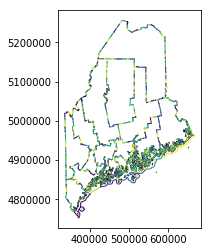

In [12]:
maineshp.plot()